In [3]:
%matplotlib inline
import numpy as np
import torch
from torch.utils.serialization import load_lua
import os
import scipy.io as sio
import cv2
import math
from matplotlib import pyplot as plt
import imp

from PIL import Image
utils = imp.load_source('utils', '../code/utils.py')

In [4]:
TRAIN_DATA_DIR = '/Data/nruiz9/data/facial_landmarks/300W_LP/'
AFW = os.path.join(TRAIN_DATA_DIR, 'AFW')

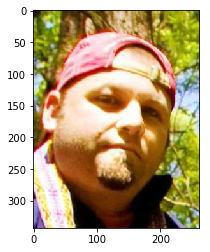

In [5]:
img_name = 'AFW_2417212918_1_1'
img_path = os.path.join(AFW, img_name + '.jpg')
mat_path = os.path.join(AFW, img_name + '.mat')

img = Image.open(img_path)
mat = sio.loadmat(mat_path)

h, w = img.size
bbox = mat['roi'][0] - w/2
x_min = min(mat['pt2d'][0,:])
y_min = min(mat['pt2d'][1,:])
x_max = max(mat['pt2d'][0,:])
y_max = max(mat['pt2d'][1,:])

k = 0.35
x_min -= 0.6 * k * abs(x_max - x_min)
y_min -= 2 * k * abs(y_max - y_min)
x_max += 0.6 * k * abs(x_max - x_min)
y_max += 0.6 * k * abs(y_max - y_min)
x_min = max(x_min,0)
x_max = min(w, x_max)
y_min = max(y_min, 0)
y_max = min(h, y_max)

img = img.crop((int(x_min), int(y_min), int(x_max), int(y_max)))
img = img.rotate(0)


plt.imshow(img)
plt.show()

(2, 68)


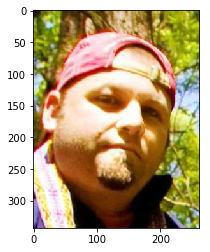

[270 316 613 659]
['roi', 'Shape_Para', 'Pose_Para', 'Exp_Para', '__header__', '__globals__', 'Color_Para', 'Illum_Para', 'pt2d', '__version__', 'Tex_Para']
pitch, yaw, roll:  4.49398 -21.1518 13.9533


In [6]:
img_name = 'AFW_2417212918_1_1'
img_path = os.path.join(AFW, img_name + '.jpg')
mat_path = os.path.join(AFW, img_name + '.mat')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
mat = sio.loadmat(mat_path)

h, w, depth = img.shape
bbox = mat['roi'][0] - w/2
x_min = min(mat['pt2d'][0,:])
y_min = min(mat['pt2d'][1,:])
x_max = max(mat['pt2d'][0,:])
y_max = max(mat['pt2d'][1,:])

k = 0.35
x_min -= 0.6 * k * abs(x_max - x_min)
y_min -= 2 * k * abs(y_max - y_min)
x_max += 0.6 * k * abs(x_max - x_min)
y_max += 0.6 * k * abs(y_max - y_min)
x_min = max(x_min,0)
x_max = min(w, x_max)
y_min = max(y_min, 0)
y_max = min(h, y_max)

cropped_img = img[int(y_min):int(y_max), int(x_min):int(x_max), :]

print mat['pt2d'].shape

plt.imshow(img)
plt.imshow(cropped_img)
plt.show()
print bbox
print mat.keys()
pitch, yaw, roll = mat['Pose_Para'][0][0:3] * 180 / np.pi
print 'pitch, yaw, roll: ', pitch, yaw, roll

[-0.21860116720199585, 1.0752100944519043, 0.11477552354335785, 281.94232177734375, 191.93988037109375, -58.196258544921875, 0.0012148042442277074]


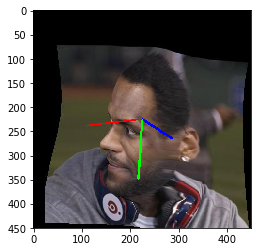

In [13]:
# For pose we have [pitch yaw roll tdx tdy tdz scale_factor]
from math import cos, sin

img_name = 'AFW_4492032921_1_12'
img_path = os.path.join(AFW, img_name + '.jpg')
mat_path = os.path.join(AFW, img_name + '.mat')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
mat = sio.loadmat(mat_path)

frame = img
pose_params = mat['Pose_Para'][0]

print pose_params.tolist()
pitch, yaw, roll, tdx, tdy, tdz, scale = pose_params
yaw *= 180 / np.pi
pitch *= 180 / np.pi
roll *= 180 / np.pi

# utils.plot_pose_cube(frame, yaw, pitch, roll, size=100)
utils.draw_axis(frame, yaw, pitch, roll, size = 130)

plt.imshow(frame)
plt.show()